In [97]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import SkewT, Hodograph
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [98]:
'''data = pd.read_csv("KABR_2022121612.csv",delimiter=',')'''
data = open("KABR_2022121612.csv","r").readlines()
print(data)

['station,validUTC,levelcode,pressure_mb,height_m,tmpc,dwpc,drct,speed_kts,bearing,range_sm\n', 'KABR,2022-12-16 12:00:00,9,956.0,397.0,-7.5,-9.1,310.0,20,0.0,0.0\n', 'KABR,2022-12-16 12:00:00,4,1000.0,48.0,M,M,M,M,M,M\n', 'KABR,2022-12-16 12:00:00,5,952.0,429.0,-8.1,-11.1,M,M,M,M\n', 'KABR,2022-12-16 12:00:00,5,944.0,494.0,-8.7,-11.5,M,M,M,M\n', 'KABR,2022-12-16 12:00:00,6,930.4,609.0,M,M,325.0,32,136.0,0.0\n', 'KABR,2022-12-16 12:00:00,4,925.0,655.0,-9.9,-12.4,330.0,33,139.0,0.0\n', 'KABR,2022-12-16 12:00:00,5,899.0,874.0,-10.5,-12.7,M,M,M,M\n', 'KABR,2022-12-16 12:00:00,6,894.3,914.0,M,M,345.0,46,149.0,0.0\n', 'KABR,2022-12-16 12:00:00,5,883.0,1012.0,-9.5,-11.3,M,M,M,M\n', 'KABR,2022-12-16 12:00:00,5,873.0,1100.0,-9.3,-11.3,M,M,M,M\n', 'KABR,2022-12-16 12:00:00,6,859.7,1219.0,M,M,355.0,32,158.0,1.0\n', 'KABR,2022-12-16 12:00:00,4,850.0,1307.0,-10.3,-12.3,350.0,31,159.0,1.0\n', 'KABR,2022-12-16 12:00:00,6,793.9,1828.0,M,M,350.0,19,162.0,2.0\n', 'KABR,2022-12-16 12:00:00,6,762.8,2133.

In [99]:
#creating empty lists to hold values from mandatory and significant levels
station_subset = []
validUTC_subset = []
levelcode_subset = []
pressure_mb_subset = []
height_m_subset = []

for line in data[1:]:
    #appending to each list the variable
    #station is the first column (split by commas)
    station.append(line.split(",")[0])
    #UTC is first column
    validUTC.append(line.split(",")[1])
    levelcode.append(line.split(",")[2])
    pressure_mb.append(line.split(",")[3])
    height_m.append(line.split(",")[4])
    tmpc.append(line.split(",")[5])
    dwpc.append(line.split(",")[6])
    drct.append(line.split(",")[7])
    speed_kts.append(line.split(",")[8])
    bearing.append(line.split(",")[9])
    #add rstrip() to get rid of "\n" at the end of range_sm
    range_sm.append(line.split(",")[10].strip())
tmpc_subset = []
dwpc_subset = []
drct_subset = []
speed_kts_subset = []
bearing_subset = []
range_sm_subset = []

#looping through each level in the sounding to check if mandatory or significant level
#doing this by looping through the indices 
for i in range(len(levelcode)):
    #if level code is manditory or significant
    if levelcode[i] == '4' or levelcode[i] == '5':
        #add the variable
        station_subset.append(station[i])
        levelcode_subset.append(levelcode[i])
        pressure_mb_subset.append(pressure_mb[i])
        height_m_subset.append(height_m[i])
        tmpc_subset.append(tmpc[i])
        dwpc_subset.append(dwpc[i])
        drct_subset.append(drct[i])
        speed_kts_subset.append(speed_kts[i])
        bearing_subset.append(bearing[i])
        range_sm_subset.append(range_sm[i])

print(tmpc_subset)


['M', '-8.1', '-8.7', '-9.9', '-10.5', '-9.5', '-9.3', '-10.3', '-16.1', '-21.5', '-21.3', '-22.5', '-23.1', '-26.7', '-38.5', '-45.1', '-52.1', '-51.9', '-51.5', '-49.1', '-47.7', '-47.9', '-49.9', '-47.9', '-49.5', '-52.5', '-51.3', '-52.7', '-55.1', '-57.7', '-57.5', '-56.7', '-61.1', '-66.5', '-72.1', '-68.1', '-60.7', '-58.1', '-56.1', 'M', '-8.1', '-8.7', '-9.9', '-10.5', '-9.5', '-9.3', '-10.3', '-16.1', '-21.5', '-21.3', '-22.5', '-23.1', '-26.7', '-38.5', '-45.1', '-52.1', '-51.9', '-51.5', '-49.1', '-47.7', '-47.9', '-49.9', '-47.9', '-49.5', '-52.5', '-51.3', '-52.7', '-55.1', '-57.7', '-57.5', '-56.7', '-61.1', '-66.5', '-72.1', '-68.1', '-60.7', '-58.1', '-56.1']


In [100]:
for i in range(len(levelcode)):
    if levelcode_subset[i] == 'M':
        levelcode_subset[i] = float('NaN')
    else:     
        levelcode_subset[i] = int(levelcode_subset[i])
    if pressure_mb_subset[i] == 'M':
        pressure_mb_subset[i] = float('NaN')
    else:
        pressure_mb_subset[i] = float(pressure_mb_subset[i])
    if height_m_subset[i] == 'M':
        height_m_subset[i] = float('NaN')
    else:
        height_m_subset[i] = float(height_m_subset[i])
    if tmpc_subset[i] == "M":
        tmpc_subset[i] = float('NaN')
    else:
        tmpc_subset[i] = float(tmpc_subset[i])
    if dwpc_subset[i] == "M":  
        dwpc_subset[i] = float('NaN')
    else: 
        dwpc_subset[i] = float(dwpc_subset[i])
    if drct_subset[i] == "M":
        drct_subset[i] = float('Nan')
    else:
        drct_subset[i] = float(drct_subset[i])
    if speed_kts_subset[i] == "M":
        speed_kts_subset[i] = float('NaN')
    else:
        speed_kts_subset[i] = float(speed_kts_subset[i])
    if bearing_subset[i] == "M":
        bearing_subset[i] = float("NaN")
    else:
        bearing_subset[i] = float(bearing_subset[i])
    if range_sm_subset[i] == "M":
        range_sm_subset[i] = float("NaN")
    else:
        range_sm_subset[i] = float(range_sm_subset[i])

print(pressure)

IndexError: list index out of range

In [101]:
#grabs the first line which is the title of the data
header = open("KABR_2022121612.csv",'r').readlines()[0]
title = open("KABR_2022121612.csv",'r').readlines()[1]
'''print(header)
print(title)'''
df_wind = data.dropna(subset=['speed_kts','drct'])

#grab each variable and add units

pressure = np.array(pressure_mb_subset)*units('millibars')
height = np.array(data['height_m'])*units('meters')
temp = np.array(data['tmpc'])*units('degC')
dewpt = np.array(data['dwpc'])*units('degC')
wind_pressure = np.array(df_wind['pressure_mb']) * units('millibars')
wind_height = np.array(df_wind['height_m']) * units('meters')
wind_speed = np.array(df_wind['speed_kts']) * units('knots')
wind_direction = np.array(df_wind['drct']) * units('degrees')

'''u = np.array(data['u-wind[m/s]'])*units('m/s').to('knots')
v = np.array(data['v-wind[m/s]'])*units('m/s').to('knots')'''

print(pressure)

AttributeError: 'list' object has no attribute 'dropna'

IndexError: index 0 is out of bounds for axis 0 with size 0

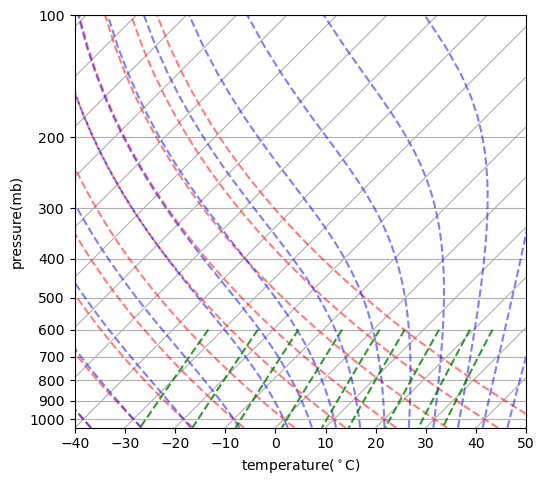

In [102]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize=(9, 9),dpi = 100)
#create Skew-T
gs = gridspec.GridSpec(3,3)
skew = SkewT(fig,rotation=45, subplot = gs[:, :2])

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
plt.xlabel('temperature($^\circ$C)')
#add a y label with units 
plt.ylabel('pressure(mb)')
#add temperature in red
skew.plot(pressure, temp, 'r',)
#add dewpoint in blue
skew.plot(pressure, dewpt, 'b')
#plot wind barbs
skew.plot_barbs(pressure, u, v)
#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,40)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
print(pressure)
lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[0], temp[0], dewpt[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')


prof = mpcalc.parcel_profile(pressure, temp[1], dewpt[1]).to('degC')
skew.plot(pressure, prof, 'k', linewidth=2)

skew.shade_cin(pressure, temp, prof, dewpt)
skew.shade_cape(pressure, temp, prof)

#to make sure everything looks okay
fig.tight_layout()
#save the skew T as skewT.png
plt.savefig('skewT.png')
